# HOMEWORK 15

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization, ReLU
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

2024-04-08 16:00:32.606625: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 16:00:32.606720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 16:00:32.731690: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

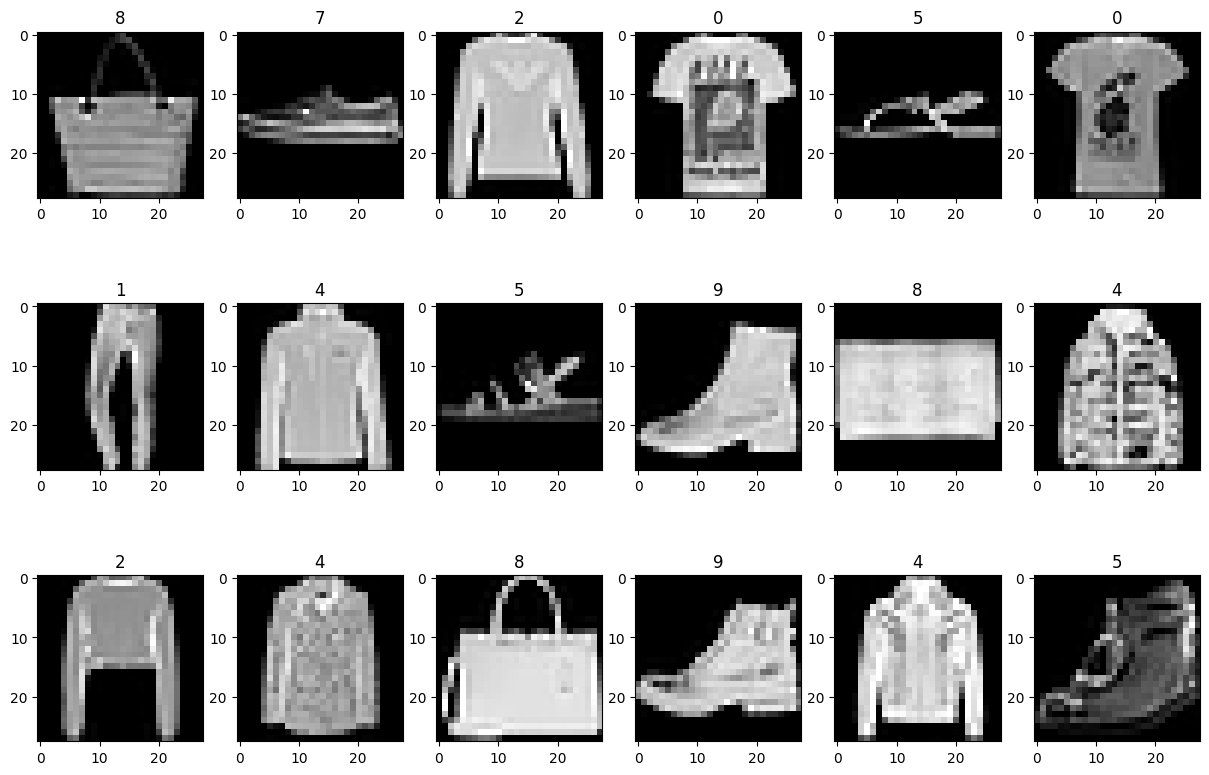

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [4]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [5]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50


2024-04-08 16:00:50.035999: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 784: 1.19604, expected 0.444774
2024-04-08 16:00:50.036050: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 785: 1.62351, expected 0.872246
2024-04-08 16:00:50.036059: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 786: 1.01271, expected 0.261445
2024-04-08 16:00:50.036067: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 787: 1.55695, expected 0.805679
2024-04-08 16:00:50.036075: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 788: 1.39061, expected 0.639345
2024-04-08 16:00:50.036082: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 789: 1.76655, expected 1.01528
2024-04-08 16:00:50.036089: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 790: 1.97533, expected 1.22406
2024-04-08 16:00:50.036097: E extern

 65/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5793 - loss: 1.4660

I0000 00:00:1712592051.245319      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8144 - loss: 0.5655

2024-04-08 16:00:53.591253: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.67352, expected 0.857533
2024-04-08 16:00:53.591308: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.29495, expected 1.47897
2024-04-08 16:00:53.591323: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.22299, expected 1.40701
2024-04-08 16:00:53.591336: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.79493, expected 0.97894
2024-04-08 16:00:53.591355: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.27216, expected 1.45617
2024-04-08 16:00:53.591366: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.33952, expected 1.52354
2024-04-08 16:00:53.591377: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.27659, expected 1.4606
2024-04-08 16:00:53.591388: E external/local_xla/xla/se

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8145 - loss: 0.5651

2024-04-08 16:00:55.352773: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.10014, expected 0.752029
2024-04-08 16:00:55.352837: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.23607, expected 0.88796
2024-04-08 16:00:55.352854: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.2616, expected 0.913488
2024-04-08 16:00:55.352889: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.28074, expected 0.932623
2024-04-08 16:00:55.352901: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 0.864034, expected 0.515919
2024-04-08 16:00:55.352912: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.05428, expected 1.70617
2024-04-08 16:00:55.352923: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 1.54678, expected 1.19866
2024-04-08 16:00:55.352946: E external/local_xla/xl

938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8145 - loss: 0.5649 - val_accuracy: 0.8848 - val_loss: 0.3190
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9023 - loss: 0.2742 - val_accuracy: 0.8922 - val_loss: 0.2979
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9185 - loss: 0.2285 - val_accuracy: 0.8971 - val_loss: 0.3002
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9296 - loss: 0.1961 - val_accuracy: 0.8962 - val_loss: 0.3142
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9401 - loss: 0.1699 - val_accuracy: 0.8956 - val_loss: 0.3329
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9474 - loss: 0.1481 - val_accuracy: 0.8948 - val_loss: 0.3565
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9537 - loss: 0.1321 - val_accuracy: 0.8950 - val_loss: 0.3844
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9595 - loss: 0.1153 - val_accuracy: 0.8895 - val_

Train Acc      0.9922666549682617
Validation Acc 0.8783000111579895


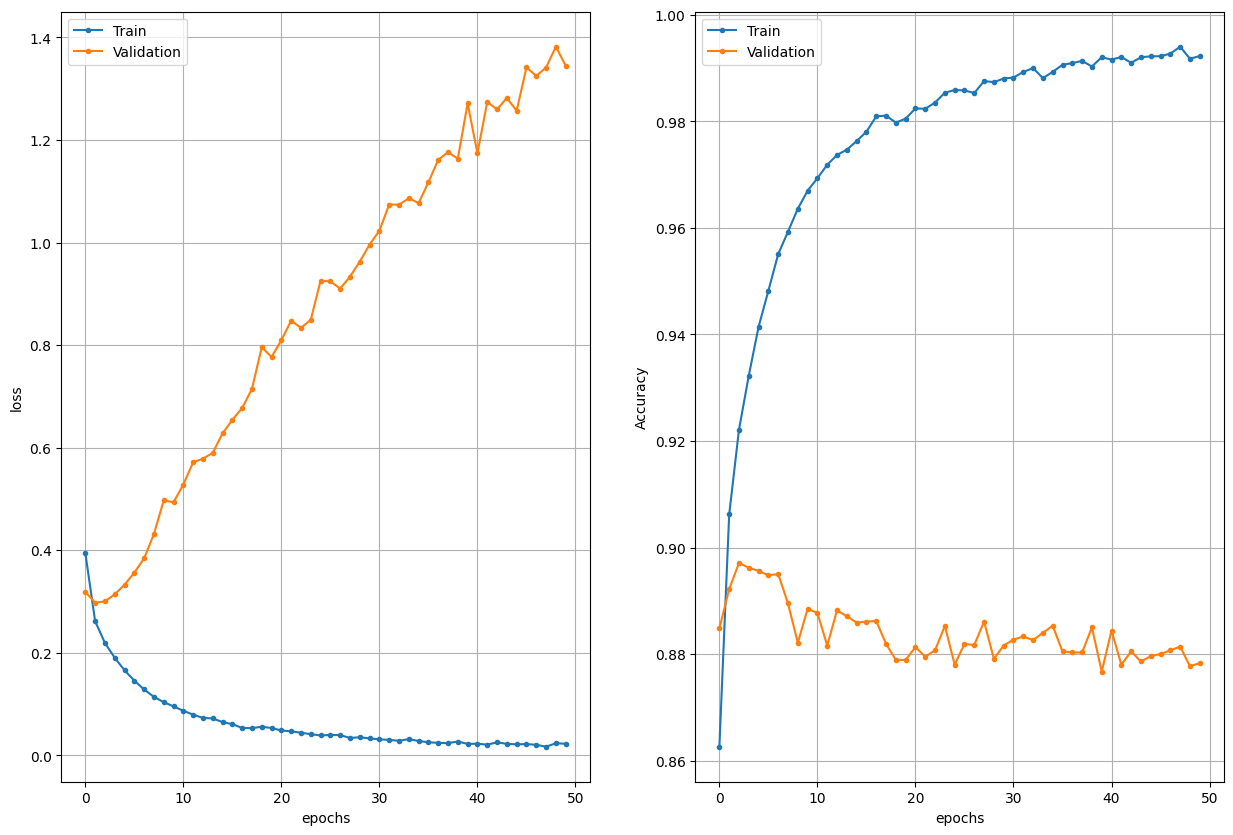

In [7]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [25]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
# net = Conv2D(32, kernel_size=(3, 3), activation="linear", padding='same')(inputs)
# net = BatchNormalization()(net)
# net = ReLU()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
# net = Dense(128)(net)
net = Dense(128, activation='relu')(net)
# net = Dense(128, activation='linear')(net)
# net = BatchNormalization()(net)
# net = ReLU()(net)
net = Dropout(0.5)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,554 (3.07 MB)

 Trainable params: 804,554 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Train the network
epochs = 50
batch_size = 64

# simple augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1,
#     rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
#     zoom_range=0.05,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test))

# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.9088 - loss: 0.2523 - val_accuracy: 0.9089 - val_loss: 0.3123
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9064 - loss: 0.2543 - val_accuracy: 0.9174 - val_loss: 0.2815
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9057 - loss: 0.2540 - val_accuracy: 0.9174 - val_loss: 0.2719
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9119 - loss: 0.2424 - val_accuracy: 0.9191 - val_loss: 0.2814
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9072 - loss: 0.2505 - val_accuracy: 0.9179 - val_loss: 0.2686
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9091 - loss: 0.2403 - val_accuracy: 0.9172 - val_loss: 0.2605
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9077 - loss: 0.2475 - val_accuracy: 0.9205 - val_loss: 0.2717
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9122 - loss: 0.2380 - 

Train Acc      0.918916642665863
Validation Acc 0.9214000105857849


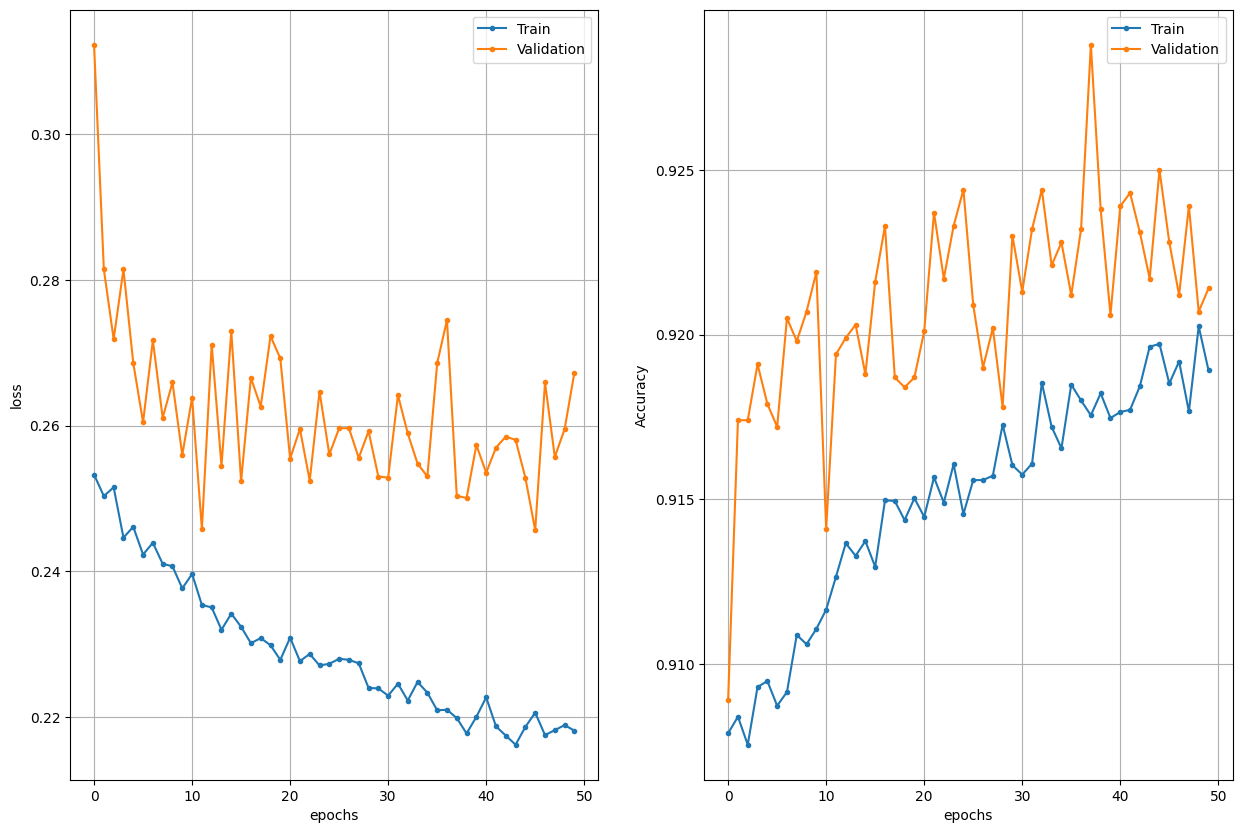

In [43]:
# Show the results
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

plot_history(history)


### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?

### Answers
- I noticed that the first Dense layer doesn't have any activation. Adding it gave 2% accuracy improvement on test set and 99.85% train accuracy, but essentially the variance stayed the same.
- Then I started to stack regularization from simple to more complex:  
1) MaxPooling layer after Conv2D layer: +0.6% test accuracy, no decrease in train accuracy.  
2) DropOut(0.5) after first Dense layer: +1.4% test accuracy, -2% train accuracy.  
3) Horizontal flip augmentation: +0.2% test accuracy, -0.5 train accuracy.  
4) Shift augmentation: +0.2% test accuracy, -5% train accuracy.  
- Results:  
    train: 99.23% -> 92.18% (50 epoch), 91.55% (early stopping)  
    test: 87.83% -> 92.14 (50 epoch), 92.88% (early stopping)  

- What didn't help:  
1) BatchNormalization for Conv2D layer: -0.8% test accuracy, -2% train accuracy.  
2) BatchNormalization for fist Dense layer: -0.8% test accuracy, +1% train accuracy.  
3) Rotation and zoom augmentation: -2% test accuracy, -12% train accuracy.  